# Assignment 7
## Due June 18 at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import assert_equal, assert_almost_equal
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

## Exercise 6: Implement classical MDS

### (a)

In [96]:
def MDS(D, d):
    """
    Classic Multidimensional Scaling 
    
    Parameters
    ---------
    D: numpy array, shape (n, n) 
       Pairwise distances of n objects.
    d: int
       Embedding dimensionality
    
    Returns
    -------
    X_embedded: numpy array, shape (n, d)
        Coordinates of the embedded objects.
    """
    S = np.zeros(D.shape)
    for i , elem_i in enumerate(S):
        for j, elem_j in enumerate(S):
            S[i][j] = 0.5 * (D[0][i]**2 + D[0][j]**2 - D[i][j]**2)
    w,v = np.linalg.eig(S)
    
    w = np.real(w) #eig returns complex values with i*0
    v = np.real(v)
    
    lambdad = np.diag(w[:d])
    lambdad = np.round(lambdad, 9)
    X_embedded = v[:, :d] @  (np.sqrt(lambdad))
    return X_embedded

In [97]:


points_3d = np.random.normal(size=(5, 3))
D = euclidean_distances(points_3d)

assert_equal(MDS(D, d=2).shape, (5, 2))
assert_equal(MDS(D, d=1).shape, (5, 1))
assert not np.iscomplexobj(MDS(D, d=2)), "Embedding should be real numbers."

In [98]:
#New cell given by the tutors in Ilias
points_50d = np.random.normal(size=(60, 50))
D = euclidean_distances(points_50d)

assert_almost_equal(MDS(D, d=40).shape, (60, 40))
assert_almost_equal(euclidean_distances(MDS(D, d=55)), D, decimal=2)
assert_almost_equal(euclidean_distances(MDS(D, d=45)), D, decimal=1)

In [99]:
points_50d = np.random.normal(size=(5, 50))
D = euclidean_distances(points_50d)

assert_almost_equal(euclidean_distances(MDS(D, d=40)), D)
assert_almost_equal(euclidean_distances(MDS(D, d=30)), D)

Do avoid loops in your implementation and use matrix operations instead!

### (b)


In [100]:
# Load cities to dataframe and apply MDS with d=2
eurocity_dataframe = pd.read_csv('eurocity.csv', index_col=0)
city_embedding = MDS(eurocity_dataframe.to_numpy(), d=2)

eurocity_dataframe

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
Cologne,2762,1498,206,409,785,0,760,1662,2436,460,...,2290,714,1764,1035,911,583,465,1497,1403,937
Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,460,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
Geneva,2610,803,677,747,853,1662,1418,0,1975,1118,...,1936,158,1439,425,328,591,513,995,2068,1019
Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,2897,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
Hamburg,2977,2018,597,714,1115,460,460,1118,2897,0,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [101]:
assert_equal(21, len(eurocity_dataframe.columns))
assert_equal((21, 2), city_embedding.shape)

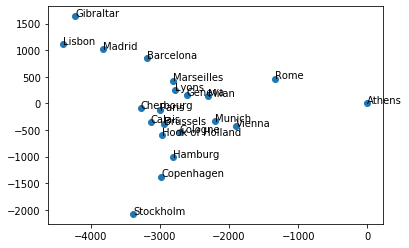

In [107]:
# Plot city embedding with annotated names
# flipped the signs of all the coordinates to match the suggested plot in the exercise sheet.
plt.scatter(-city_embedding[:,:1], -city_embedding[:,1:])
for idx, elem in enumerate(eurocity_dataframe.index):
    plt.annotate(elem,(-city_embedding[idx,:1], -city_embedding[idx,1:]))
plt.show()

### (c)

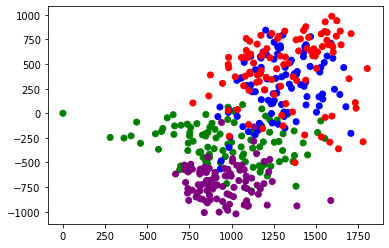

In [133]:
import matplotlib

train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).values
y = train_df['Label'].values
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

D = euclidean_distances(X)
embedding = MDS(D, d=2)

colors = ['red','black','black','green','black','black','blue','black','black','purple']

plt.scatter(embedding[:,:1].ravel(), embedding[:,1:].ravel(), c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()